<a href="https://colab.research.google.com/github/ericgbraz/COLAB_PED/blob/main/PED_Aula_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import sqlite3
import numpy as np
#conexao = sqlite3.connect(':memory:') 
conexao = sqlite3.connect('aluno.db') 
cursor = conexao.cursor()

sql = 'create table aluno('\
'idAluno integer primary key autoincrement,'\
'nome varchar(100) not null,'\
'sexo char)'
cursor.execute(sql)



In [28]:
sql = 'insert into aluno (nome, sexo) values(?,?)'
cursor.execute(sql, ['Alexandre', 'M']) #insere apenas um registro
conexao.commit()


In [29]:
alunos = [['Sílvia', 'F'], ['Carlos','M'], ['Maria', 'F'], ['João', np.NaN]]

#inserindo diversos registros
for aluno in alunos:
    cursor.execute(sql, aluno)

conexao.commit()

In [20]:
sql = 'select * from aluno'

cursor.execute(sql)
alunos = cursor.fetchall()

print(alunos)

for aluno in alunos:
    print(aluno)


[(1, 'Alexandre', 'M')]
(1, 'Alexandre', 'M')


In [21]:
sql = 'update aluno '\
' set nome = ?'\
' where idAluno = ?'

cursor.execute(sql, ['Alexandre Siqueira Dias', 1]) 

conexao.commit()




[]


In [24]:
cursor.execute('select * from aluno')
alunos = cursor.fetchall()

print(alunos)

[(1, 'Alexandre Siqueira Dias', 'M')]


In [30]:
sql = 'delete from aluno where idAluno = ?'
cursor.execute(sql, [1]) 
conexao.commit()


In [31]:
cursor.execute('select * from aluno')
alunos = cursor.fetchall()

print(alunos)

[(2, 'Sílvia', 'F'), (3, 'Carlos', 'M'), (4, 'Maria', 'F'), (5, 'João', None)]


In [32]:
sql = 'select * from aluno where idaluno >= ? and sexo = ?'

cursor.execute(sql, [2, 'F'])
alunos = cursor.fetchall()

for id, nome, sexo in alunos: #acessando cada campo individualmente
    print(id, nome, sexo)


2 Sílvia F
4 Maria F


In [33]:
sql = 'select * from aluno where sexo is null'

cursor.execute(sql)
alunos = cursor.fetchall()

print(alunos)


[(5, 'João', None)]


In [34]:
import pandas as pd
import sqlite3

# Carregando dados do SQLite para o pandas
df = pd.read_sql_query("SELECT * from aluno", conexao)

df


,idAluno,nome,sexo
0,2,Sílvia,F
1,3,Carlos,M
2,4,Maria,F
3,5,João,None


<Axes: >

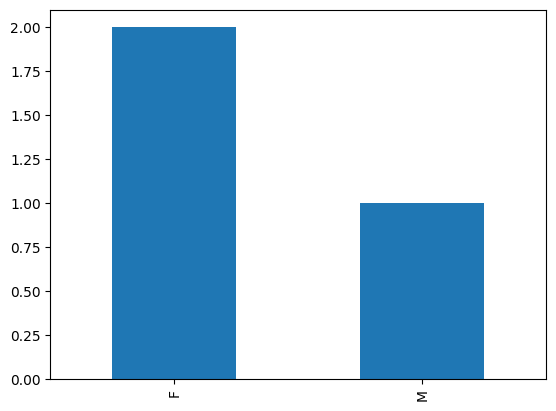

In [35]:
import pandas as pd
import sqlite3

# Carregando dados do SQLite para o pandas
df = pd.read_sql_query("SELECT * from aluno", conexao)

df['sexo'].value_counts()

df['sexo'].value_counts().plot(kind = 'bar')
